In [1]:
#PHASE II: Data Exploration
#Exploring the Hotel Booking Dataset.

#This dataset contains the following attributes:
#1. hotel (Hotel (H1 = Resort Hotel or H2 = City Hotel))
#2. is_canceled  (Value indicating if the booking was canceled (1) or not (0))
#3. lead_time  (Number of days that elasped between the entering date of the booking into the PMS and the arrival date)
#4. arrival_date_year  (Year of arrival date)
#5. arrival_date_month  (Month of arrival date)
#6. arrival_date_week_number  (Week number of year for arrival date)
#7. arrival_date_day_of_month  (Day of arrival date)
#8. stays_in_weekend_nights  (Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel)
#9. stays_in_week_nights  (Number of week nights (Monday or Friday) the guest stayed or booked to stay at the hotel)
#10. adults  (Number of adults)
#11. children  (Number of children() 
#12. babies  (Number of babies)
#13. meal  (type of meal booked. Categories are presented in standarad hospitality meal packages: Undefined/SC - no meal)
#14. country  (Country of origin. Categories are represented in the ISO 3155-3:2013 format)
#15. market_segment  (Market segement designation. In categories, the term "TA" means "Travel Agents" and "TO" means "Tour Operators")
#16. distribution_channel  (Booking distribution channel. The term "TA" means "Travel Agents" and "TO" means "Tour Operators")
#17. is_repeated_guest  (Value indicating if the booking name was from a repeated guest (1) or not (0))
#18. previous_cancellations  (Number of previous booking that were cancelled by the customer prior to the current booking)
#19. previous_bookings_not_canceled  (Number of previous bookings not cancelled by the customer prior to the current booking) 
#20. reserved_room_type  (Code of room type reserved. COde is presented instead of designation for anonymity reasons)
#21. assigned_room_type  (Code for the type of room)
#22. booking_changes  (Number of changes/amendments made to the booking from the moment the booking was entered on the PMS)
#23. deposit_type  (Indication on if the customer made a deposit to guarantee the booking. This variable can assume the categories)
#24. agent  (ID of the travel agency that made the booking)
#25. company (ID of the company/entity that made the booking responsible for paying the booking. ID is presented instead of designation)
#26. days_in_waiting_list (Number of days the booking was in the waiting list before it was confirmed to the customer)
#27. customer_type  (Type of booking)
#28. adr (Average Daily Rate as defined by dividng the sum of all lodging transactions by the total number of staying nights)
#29. required_car_parking_spaces (Number of car spaces required by the customer)
#30. total_of_special_requests (Number of Special requests made by the customer (e.g.twin bed or high floor))
#31. reservations_status (Reservation last status, assuming one of three categories: Canceled, Check-Out, No-Show)
#32. reservations_status_date  (Date at which the last status was set)
    

In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [23]:
sns.set(style='whitegrid')
pd.set_option('display.max_columns',36)
adf = pd.read_csv('hotel_bookings.csv')
df = adf

In [24]:
df.info()
#target variable will be is_canceled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

In [25]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
| Attribute                     | Data Type    | Data Scale |
|-------------------------------|--------------|------------| 
|hotel                          |object        |nominal     | 
|is_canceled                    |int64         |nominal     | 
|lead_time                      |int64         |ratio       |
|arrival_date_year              |int64         |ordinal     |
|arrival_date_month             |object        |ordinal     |
|arrival_date_week_number       |int64         |ordinal     |
|arrival_date_day_of_month      |int64         |ordinal     |
|stays_in_weekend_nights        |int64         |ratio       |
|stays_in_week_nights           |int64         |ratio       |
|adults                         |int64         |interval    |
|children                       |float64       |ratio       |
|babies                         |int64         |ratio       |
|meal                           |object        |nominal     |
|country                        |object        |nominal     |
|market_segment                 |object        |nominal     |
|distribution_channel           |object        |nominal     |
|is_repeated_guest              |int64         |nominal     |
|previous_cancellation          |int64         |ratio       |
|previous_bookings_not_canceled |int64         |ratio       |
|reserved_room_type             |object        |nominal     |
|assigned_room_type             |object        |nominal     |
|booking_changes                |int64         |ratio       |
|deposit_type                   |object        |nominal     |
|agent                          |float64       |nominal     |
|company                        |float64       |nominal     |
|days_in_waiting_list           |int64         |ratio       |
|customer_type                  |object        |nominal     |
|adr                            |float64       |ratio       |
|required_car_parking_spaces    |int64         |ordinal     |
|total_of_special_requests      |int64         |ratio       |
|reservation_status             |object        |nominal     |
|reservation_status_date        |object        |interval    |

SyntaxError: invalid syntax (<ipython-input-6-4e6b4ddce2ee>, line 1)

In [26]:
# unique values and checking for missing values 
for (name, series) in df.iteritems():
    print('Column:', name)
    print('\tNumber of unique values', series.unique().size)
    print('\tNumber of missing values', series.isnull().sum())


Column: hotel
	Number of unique values 2
	Number of missing values 0
Column: is_canceled
	Number of unique values 2
	Number of missing values 0
Column: lead_time
	Number of unique values 479
	Number of missing values 0
Column: arrival_date_year
	Number of unique values 3
	Number of missing values 0
Column: arrival_date_month
	Number of unique values 12
	Number of missing values 0
Column: arrival_date_week_number
	Number of unique values 53
	Number of missing values 0
Column: arrival_date_day_of_month
	Number of unique values 31
	Number of missing values 0
Column: stays_in_weekend_nights
	Number of unique values 17
	Number of missing values 0
Column: stays_in_week_nights
	Number of unique values 35
	Number of missing values 0
Column: adults
	Number of unique values 14
	Number of missing values 0
Column: children
	Number of unique values 6
	Number of missing values 4
Column: babies
	Number of unique values 5
	Number of missing values 0
Column: meal
	Number of unique values 5
	Number of m

In [27]:
#Displaying missing values in a more concise way
#Attributes which have: children, country, agent, and company
print(df.isnull().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [28]:
#Replacing missing values: for agent, company, country, and children
#setting default values 
missingVal_replacement = {'children': 0.0, 'country': 'Unknown', 'agent': 0, 'company': 0}
df_update = df.fillna(missingVal_replacement)

#meal contains values 'Undefined', which is equal to SC (no meal)
df_update['meal'].replace('Undefined', 'SC', inplace=True)

#some rows in the dataset has 0 adults, 0 children, and 0 babies; therefore will be dropped
zero_guests = list(df_update.loc[df_update['adults']+ df_update['children']+df_update['babies']==0].index)
df_update.drop(df_update.index[zero_guests], inplace=True)

In [29]:
#dataset before update
print("Dataset before update: ", df.shape)
#dataset after update
print('Dataset after update: ',df_update.shape)

Dataset before update:  (119390, 32)
Dataset after update:  (119210, 32)


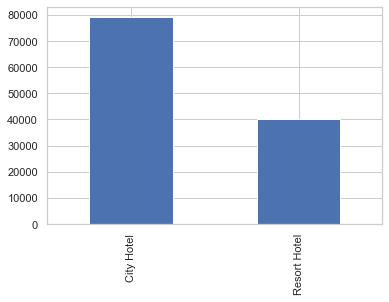

In [30]:
#creating bar plot to distinguish between resort hotel and city hotel
df_update['hotel'].value_counts().plot(kind='bar')

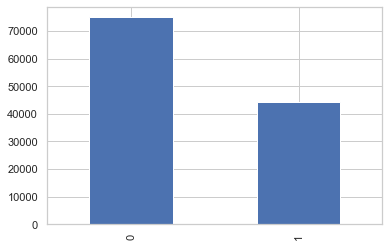

In [31]:
#creating bar plot to distinguish between canceled (1) and not canceled (0)
df_update['is_canceled'].value_counts().plot(kind='bar')

In [32]:
#absolute cancelations
total_cancelations = df_update['is_canceled'].sum()
#resort hotel cancelations
rh_cancelations = df_update.loc[df_update['hotel'] == 'Resort Hotel']['is_canceled'].sum()
#city hotel cancelations
ch_cancelations = df_update.loc[df_update['hotel'] == 'City Hotel']['is_canceled'].sum()

print('Total bookings canceled:' ,total_cancelations)
print('Resort hotel bookings canceled: ',rh_cancelations)
print('City hotel booking canceled: ', ch_cancelations)

Total bookings canceled: 44199
Resort hotel bookings canceled:  11120
City hotel booking canceled:  33079


In [33]:
#handling outliers for numerical features that aren't binary, IDs, or a date
def outlier_treatment(x, lower, upper):
    if (lower >= x) or (x >= upper):
        return 'Yes'
    else:
        return 'No'

columns_to_check = ['lead_time','total_of_special_requests','required_car_parking_spaces','booking_changes','previous_cancellations', 'agent',
                    'adults','previous_bookings_not_canceled', 'days_in_waiting_list','adr','babies','stays_in_week_nights','company','arrival_date_year',
                    'children', 'stays_in_weekend_nights']

for col in columns_to_check: 
    Q1,Q3 = np.percentile(df[col],[25,75])
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df['outlier'] = df[col].apply(lambda x: outlier_treatment(x, lower_bound,upper_bound))
    print(f"The lower and upper bound of the range for '{col}' respectively is: {lower_bound} and {upper_bound}")


The lower and upper bound of the range for 'lead_time' respectively is: -195.0 and 373.0
The lower and upper bound of the range for 'total_of_special_requests' respectively is: -1.5 and 2.5
The lower and upper bound of the range for 'required_car_parking_spaces' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'booking_changes' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'previous_cancellations' respectively is: 0.0 and 0.0


C:\Users\tvrju\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


The lower and upper bound of the range for 'agent' respectively is: nan and nan
The lower and upper bound of the range for 'adults' respectively is: 2.0 and 2.0
The lower and upper bound of the range for 'previous_bookings_not_canceled' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'days_in_waiting_list' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'adr' respectively is: -15.774999999999991 and 211.065
The lower and upper bound of the range for 'babies' respectively is: 0.0 and 0.0
The lower and upper bound of the range for 'stays_in_week_nights' respectively is: -2.0 and 6.0
The lower and upper bound of the range for 'company' respectively is: nan and nan
The lower and upper bound of the range for 'arrival_date_year' respectively is: 2014.5 and 2018.5
The lower and upper bound of the range for 'children' respectively is: nan and nan
The lower and upper bound of the range for 'stays_in_weekend_nights' respectively is: -3.0 and 5.0


In [13]:
#finding which numerical feature are most important
cancel_corr = df.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)[1:]
#From the list below: lead_time, total_of_special_requests, required_car_parking_spaces
#booking_changes and previous_cancellations are the 5 most important features
#also some of the most important non-numerical feature are: reservation_status and deposit type

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

In [14]:
#numerical feature to normalize that have significant impact on is_canceled
from sklearn import preprocessing
df_normalize = df_update._get_numeric_data()
df_concise = df_normalize[['lead_time', 'days_in_waiting_list','total_of_special_requests', 'adr','agent',
                           'stays_in_week_nights','previous_cancellations','arrival_date_day_of_month',
                           'arrival_date_week_number','is_canceled']]

df_minmax = df_concise
print(df_minmax.head())
min_max_scaler = preprocessing.MinMaxScaler()

a_scaled = min_max_scaler.fit_transform(df_minmax)

df_scaled = pd.DataFrame(data=a_scaled, columns = df_minmax.columns)
df_scaled.head()



   lead_time  days_in_waiting_list  total_of_special_requests   adr  agent  \
0        342                     0                          0   0.0    0.0   
1        737                     0                          0   0.0    0.0   
2          7                     0                          0  75.0    0.0   
3         13                     0                          0  75.0  304.0   
4         14                     0                          1  98.0  240.0   

   stays_in_week_nights  previous_cancellations  arrival_date_day_of_month  \
0                     0                       0                          1   
1                     0                       0                          1   
2                     1                       0                          1   
3                     1                       0                          1   
4                     2                       0                          1   

   arrival_date_week_number  is_canceled  
0                  

,lead_time,days_in_waiting_list,total_of_special_requests,adr,agent,stays_in_week_nights,previous_cancellations,arrival_date_day_of_month,arrival_date_week_number,is_canceled
0,0.464043,0.0,0.0,0.001180,0.000000,0.00,0.0,0.0,0.5,0.0
1,1.000000,0.0,0.0,0.001180,0.000000,0.00,0.0,0.0,0.5,0.0
2,0.009498,0.0,0.0,0.015053,0.000000,0.02,0.0,0.0,0.5,0.0
3,0.017639,0.0,0.0,0.015053,0.568224,0.02,0.0,0.0,0.5,0.0
4,0.018996,0.0,0.2,0.019307,0.448598,0.04,0.0,0.0,0.5,0.0


In [15]:
#convert df_scaled to csv file
df_scaled.to_csv('abt.csv')